# Spam Email Classification

##### using classifiers: Naive Bayes, Extreme Gradient Boosting, Decision Tree, Random Forest, Logistic Regression & Support Vector Classifiers

========================================================================================================================

## Importing Required Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#Ensembles : Bagging and Boosting
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# SMOTE oversampling
from imblearn.over_sampling import SMOTE

# Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

# Warnings
import warnings
warnings.filterwarnings("ignore")


## Loading Dataset

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


There are 5172 instances of emails and 3002 columns. One column is for Email No. acting as email id and one column is for Prediction if email is spam or not: 1 meaning spam and 0 meaning not spam. Rest of 3000 columns are most common words in an email with repetition in an email as their values.

**Data Analysis**

In [4]:
df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
df.nunique()

Email No.     5172
the             90
to              72
ect             90
and             53
              ... 
military         4
allowing         3
ff              23
dry              4
Prediction       2
Length: 3002, dtype: int64

Email No. is just an identifier for email and is not needed so we will drop the column.

In [6]:
df.drop("Email No.",axis=1, inplace=True)


In [7]:
df.head(5)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


All the columns are most used words and the values are the number of repetition of those words in each email respectively making all the data types int64. As for Prediction Column (Target) has values 0 or 1.

In [9]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


**Let's check Target Column**

<AxesSubplot:xlabel='Prediction'>

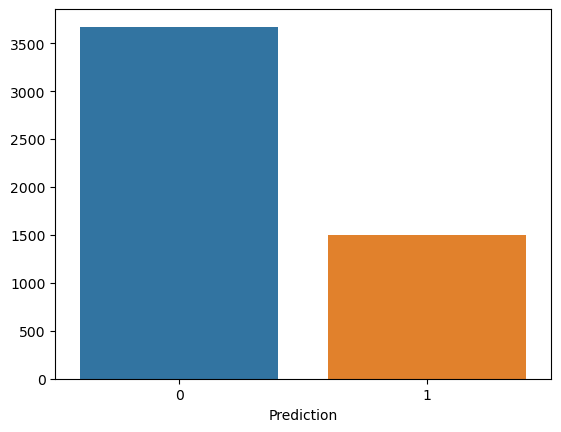

In [10]:
count = df.groupby(df.Prediction).size()

sns.barplot(data=df, x=count.index, y=count)

We can see the Target value are highly unbalanced. We will use SMOTE which is a oversapmling technique to train our data on values equally. Using SMOTE, our data samples are increased in numbers by interpolation method.

### Data Splitting

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=20)

In [12]:
oversample = SMOTE()
X_train_sampled, y_train_sampled = oversample.fit_resample(X_train,y_train)

### Metrics and Evaluation

Before we use various models, let's create a function that'll be used for model evaluation.


In [13]:
def evaluate(y_test,y_pred):
    print("Precision Score: ",precision_score(y_test,y_pred))
    print("Recall Score: ",recall_score(y_test,y_pred))
    print("Accuracy Score: ",accuracy_score(y_test,y_pred))
    print("F1 Score: ",f1_score(y_test,y_pred))
    print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print("\n")
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred),display_labels=['Spam','Not Spam'])
    cm_display.plot()
    plt.show()

### Naive Bayes


Naive Bayes is a classification algorithm based on Bayes' theorem. It assumes that the features are conditionally independent of each other given the class label.

Gaussian Naive Bayes is a variant of Naive Bayes that assumes the features follow a Gaussian (normal) distribution. It is suitable for continuous features and uses the probability density function to calculate the likelihood of a feature given a class.

Multinomial Naive Bayes is another variant that is used for discrete features, particularly when dealing with text classification. It assumes that features are generated from a multinomial distribution and calculates the probability of a feature given a class using the feature's frequency in the training data.

**Gaussian Naive Bayes**

Precision Score:  0.9037974683544304
Recall Score:  0.952
Accuracy Score:  0.9566898685228151
F1 Score:  0.9272727272727272

Confusion Matrix: 
 [[880  38]
 [ 18 357]]




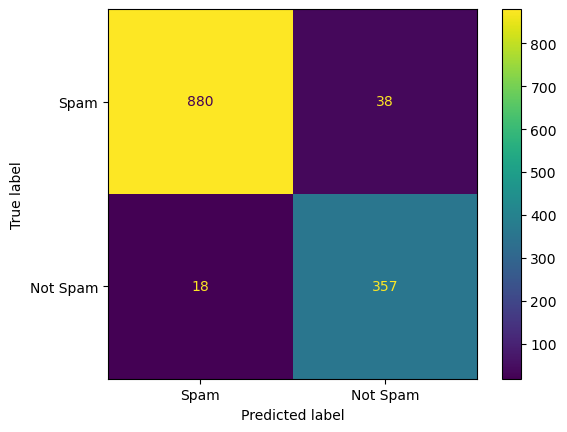

In [14]:
# Model selection
model_gnb = GaussianNB()

# Model Train
model_gnb.fit(X_train_sampled,y_train_sampled)

# Prediction
y_pred_gnb = model_gnb.predict(X_test)

# Evaluation
evaluate(y_test,y_pred_gnb)

**Multinomial Naive Bayes**

Precision Score:  0.9156010230179028
Recall Score:  0.9546666666666667
Accuracy Score:  0.9613302397525135
F1 Score:  0.9347258485639687

Confusion Matrix: 
 [[885  33]
 [ 17 358]]




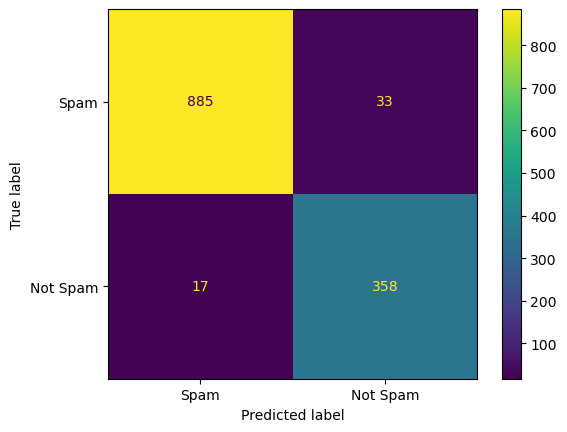

In [15]:
# Model selection
model_mnb = MultinomialNB()

# Model Train
model_mnb.fit(X_train_sampled,y_train_sampled)

# Prediction
y_pred_mnb = model_mnb.predict(X_test)

# Evaluation
evaluate(y_test,y_pred_mnb)

### Decision Tree Classifier

Decision Tree Classifier recursively splits the data based on features and thresholds, aiming to create pure subsets. It uses the majority class of each subset to assign classes during prediction.

Decision Tree Classifier can be prone to overfitting, where the model becomes overly complex and highly tailored to the training data, resulting in poor generalization to unseen data. To minimize overfitting, we can employ the following techniques:

Pruning: This involves limiting the depth of the tree or removing nodes that do not significantly improve the model's performance. Pruning helps to reduce overfitting by simplifying the decision tree.

Minimum samples per leaf: Setting a minimum number of samples required to create a leaf node helps prevent the tree from splitting too much and capturing noise in the data. It ensures that each leaf contains a sufficient number of instances for reliable predictions.

Maximum depth: Constraining the maximum depth of the tree restricts its complexity. It prevents the model from becoming too deep and overfitting the training data.

Feature selection: Carefully selecting relevant features can help avoid overfitting. Choosing informative features that are more predictive of the target variable can improve the model's performance and reduce the chances of overfitting.

Precision Score:  0.8814432989690721
Recall Score:  0.912
Accuracy Score:  0.9389017788089714
F1 Score:  0.8964613368283093

Confusion Matrix: 
 [[872  46]
 [ 33 342]]




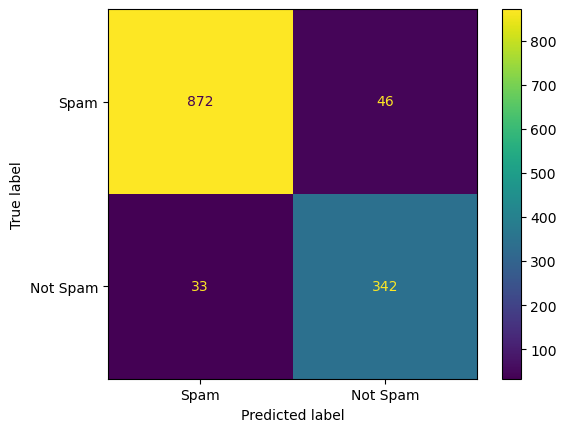

In [16]:
# Model selection
model_dt = DecisionTreeClassifier()

# Model Train
model_dt.fit(X_train_sampled,y_train_sampled)

# Prediction
y_pred_dt = model_dt.predict(X_test)

# Evaluation
evaluate(y_test,y_pred_dt)

**Tree Visualization**

In [17]:
feature_names = df.columns[0:3000]
viz = df.copy()
viz["Prediction"]=viz["Prediction"].values.astype(str)
print(viz.dtypes)
target_names = viz['Prediction'].unique().tolist()



the            int64
to             int64
ect            int64
and            int64
for            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction    object
Length: 3001, dtype: object


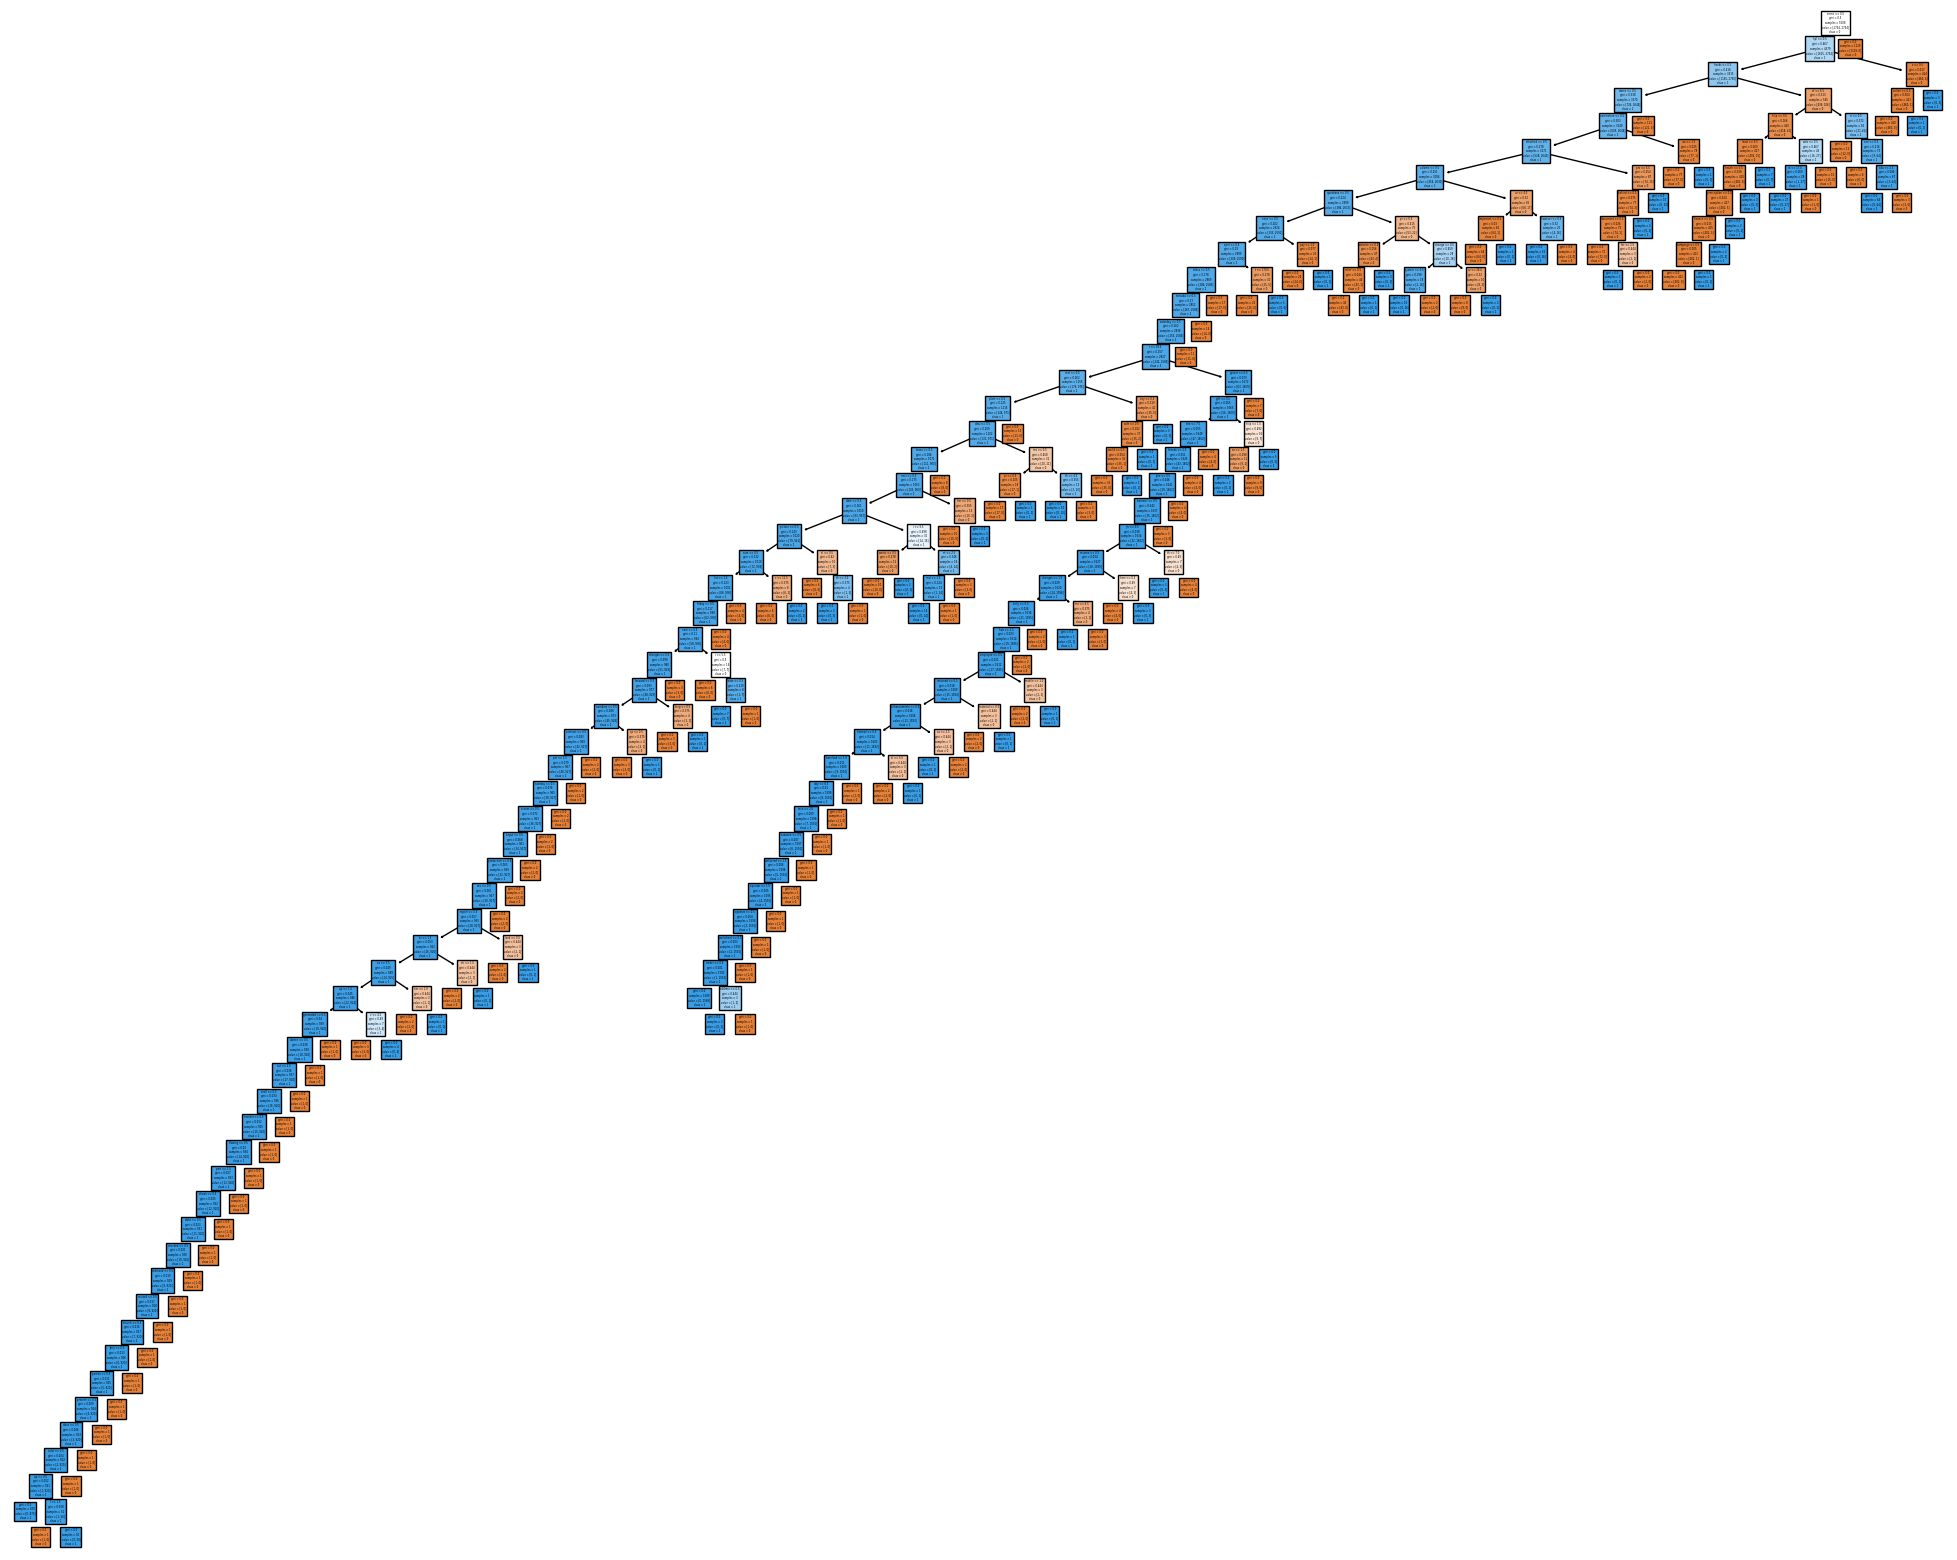

In [18]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

### Support Vector Classifier


Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification tasks. It finds a hyperplane in a high-dimensional feature space that maximizes the margin between different classes. SVC utilizes kernel functions to transform the data into a higher-dimensional space without explicitly computing the coordinates. This allows it to handle complex, nonlinear classification problems. By identifying support vectors, which are the closest data points to the hyperplane, SVC determines the decision boundary and makes predictions.

Precision Score:  0.7875
Recall Score:  0.672
Accuracy Score:  0.8522815158546017
F1 Score:  0.7251798561151079

Confusion Matrix: 
 [[850  68]
 [123 252]]




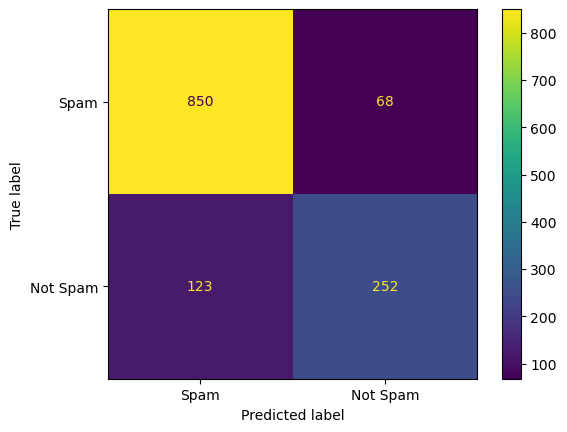

In [19]:
# Model selection
model_svc = SVC()

# Model Train
model_svc.fit(X_train_sampled,y_train_sampled)

# Prediction
y_pred_svc = model_svc.predict(X_test)

# Evaluation
evaluate(y_test,y_pred_svc)

### Logistic Regression

Logistic Regression is a classification algorithm used to predict binary or multi-class outcomes based on input features.

It models the relationship between the features and the probability of belonging to a particular class using the logistic function.

The logistic function, also known as the sigmoid function, maps any real-valued number to a value between 0 and 1, representing the probability of belonging to the positive class.

During training, logistic regression estimates the optimal weights for each feature by minimizing a cost function, typically using optimization algorithms like gradient descent.

To make predictions, logistic regression applies the learned weights to the input features and calculates the predicted probabilities. The class with the highest probability is assigned as the predicted class.

Logistic regression assumes that the relationship between the features and the outcome is linear on the log-odds scale, making it suitable for both linearly separable and non-linearly separable datasets when combined with appropriate feature transformations or interactions.

Precision Score:  0.9224806201550387
Recall Score:  0.952
Accuracy Score:  0.962877030162413
F1 Score:  0.937007874015748

Confusion Matrix: 
 [[888  30]
 [ 18 357]]




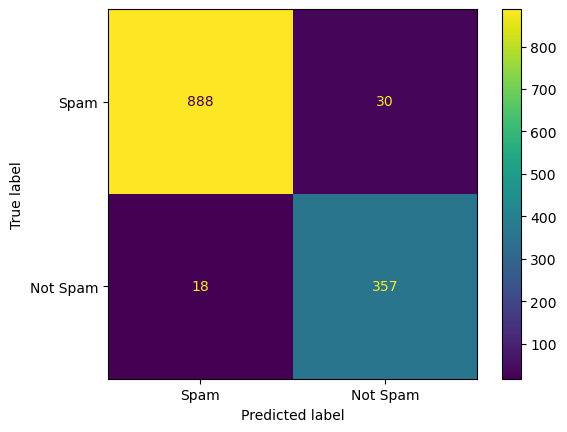

In [20]:
# Model selection
model_lr = LogisticRegression()

# Model Train
model_lr.fit(X_train_sampled,y_train_sampled)

# Prediction
y_pred_lr = model_lr.predict(X_test)

# Evaluation
evaluate(y_test,y_pred_lr)

### Ensemble Methods

#### XGB CLassifier

XGB Classifier is a popular and efficient gradient boosting algorithm for classification tasks.

It combines weak prediction models, usually decision trees, to create a strong ensemble model.

The algorithm sequentially trains the models, with each subsequent model focusing on correcting the mistakes of the previous ones.

XGB Classifier optimizes a specific objective function using gradient descent techniques and adjusts model weights and parameters.

It handles both numerical and categorical features effectively and includes regularization techniques to prevent overfitting and improve generalization.

Precision Score:  0.925
Recall Score:  0.9866666666666667
Accuracy Score:  0.9729311678267595
F1 Score:  0.9548387096774195

Confusion Matrix: 
 [[888  30]
 [  5 370]]




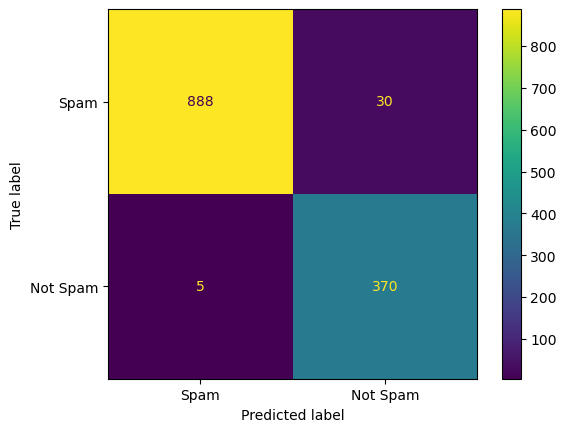

In [21]:
model_xgb = XGBClassifier().fit(X_train_sampled,y_train_sampled)

y_pred_xgb = model_xgb.predict(X_test)

evaluate(y_test,y_pred_xgb)

#### Random Forest

Random Forest Classifier is a powerful ensemble learning algorithm for classification tasks.

It constructs multiple decision trees and combines their predictions to make final classifications.

Each decision tree is trained on a random subset of the training data and a random subset of the features.

Random Forest Classifier leverages the concept of bagging to reduce overfitting and improve model performance.

It generates predictions by aggregating the individual predictions of the decision trees through voting or averaging.

Precision Score:  0.9111111111111111
Recall Score:  0.984
Accuracy Score:  0.9675174013921114
F1 Score:  0.9461538461538462

Confusion Matrix: 
 [[882  36]
 [  6 369]]




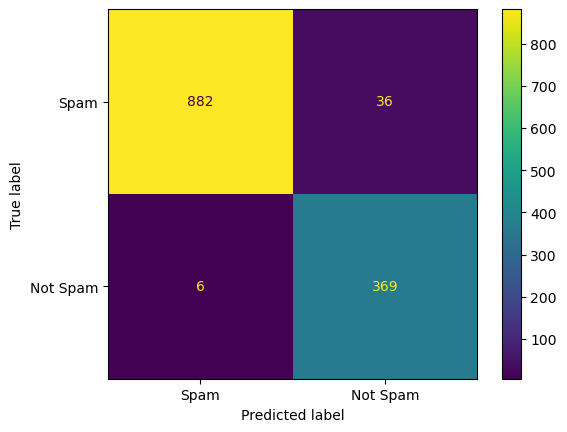

In [22]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_sampled,y_train_sampled)

y_pred_rf = model_rf.predict(X_test)

evaluate(y_test,y_pred_rf)

**Tree Visualization**


In [23]:
estimators = model_rf.estimators_[50]
estimators

DecisionTreeClassifier(max_features='sqrt', random_state=1856673122)

In [24]:
from sklearn.tree import export_graphviz

export_graphviz(estimators, out_file="Random_forest.dot", feature_names=feature_names, 
                class_names=target_names, rounded = True,
               proportion=False, precision = 2, filled=True
               )

In [29]:
# !dot -Tpng Random_forest.dot -o Random_forest.png -Gdpi=600


## Precision Recall Curve


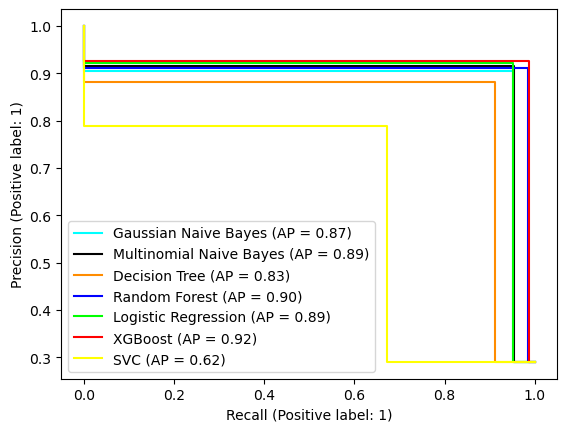

In [27]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_gnb, name=f"Gaussian Naive Bayes", color="cyan", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="darkorange", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="blue", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="lime", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost", color="red", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, name=f"SVC", color="yellow", ax=ax)

## ROC Curve


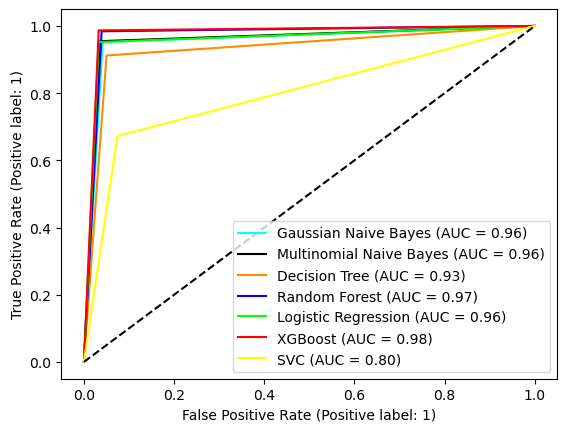

In [28]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_pred_gnb, name=f"Gaussian Naive Bayes", color="cyan", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="darkorange", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="blue", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="lime", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost", color="red", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_svc, name=f"SVC", color="yellow", ax=ax)
plt.plot([0, 1], [0, 1], color="black", linestyle="--")